In [ ]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


In [ ]:
file_path=r"C:\Users\salon"

In [ ]:
name_class=os.listdir(file_path)
name_class


['normal',
 'normal-20250422T050836Z-001.zip',
 'vitiligo',
 'vitiligo-20250422T050842Z-001.zip']

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)


<Figure size 1600x1600 with 0 Axes>

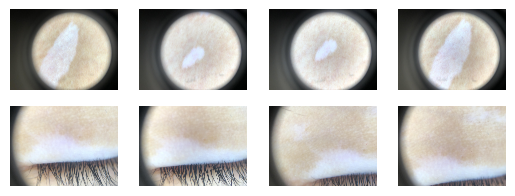

In [ ]:
normal_dir = os.path.join(r"C:\Users\salon\normal")
vitiligo_dir = os.path.join(r"C:\Users\salon\vitiligo")
normal_names = os.listdir(normal_dir)
vitiligo_names = os.listdir(vitiligo_dir)
pic_index = 210
normal_images = [os.path.join(normal_dir, fname)
              for fname in normal_names[pic_index-8:pic_index]]
vitiligo_images = [os.path.join(vitiligo_dir, fname)
              for fname in vitiligo_names[pic_index-8:pic_index]]

for i, img_path in enumerate(normal_images + vitiligo_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
base_dir = r"C:\Users\salon"

train_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='training',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
                                                  image_size=(200,200),
                                                  subset='validation',
                                                  seed = 1,
                                                 validation_split=0.1,
                                                  batch_size= 32)


Found 473 files belonging to 2 classes.
Using 426 files for training.
Found 473 files belonging to 2 classes.
Using 47 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(train_datagen,
          epochs=10,
          validation_data=test_datagen)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 631ms/step - accuracy: 0.8209 - loss: 0.4146 - val_accuracy: 0.8085 - val_loss: 7.8791
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 578ms/step - accuracy: 0.9648 - loss: 0.1317 - val_accuracy: 0.8298 - val_loss: 0.4820
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 594ms/step - accuracy: 0.9715 - loss: 0.1010 - val_accuracy: 0.8085 - val_loss: 3.0014
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 601ms/step - accuracy: 0.9812 - loss: 0.1082 - val_accuracy: 0.8936 - val_loss: 0.2943
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 647ms/step - accuracy: 0.9681 - loss: 0.0880 - val_accuracy: 0.1915 - val_loss: 1.8065
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 637ms/step - accuracy: 0.9728 - loss: 0.0698 - val_accuracy: 0.8723 - val_loss: 0.6882
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 654ms/step - accuracy: 0.9890 - loss: 0.0428 - val_accuracy: 0.8511 - val_loss: 0.6970
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 636ms/step - accuracy: 0.9798 - loss: 0.0625 - val_accuracy: 

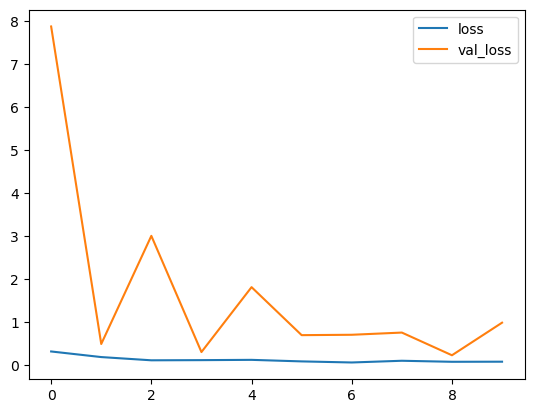

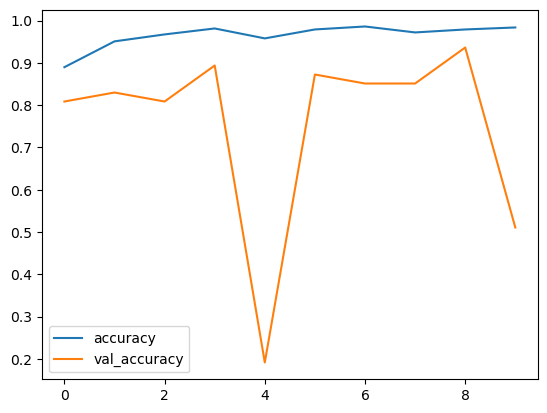

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
normal


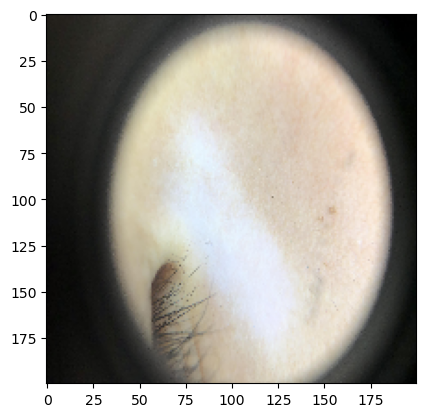

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(200, 200))
    plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    print("normal" if result >= 0.5 else "vitiligo")



p=predict_image(r"C:\Users\salon\vitiligo\img_t_10_0054_jpg.rf.1b01e9d07b44c2650680469504fd5853.jpg")
p


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def extract_white_color(image, lower_thresh=(200, 200, 200), upper_thresh=(255, 255, 255)):
    # Convert image to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Convert to binary mask where white pixels are within the threshold
    lower_bound = np.array(lower_thresh, dtype=np.uint8)

    upper_bound = np.array(upper_thresh, dtype=np.uint8)
    mask = cv2.inRange(image, lower_bound, upper_bound)

    # Apply the mask to extract white regions

    result = cv2.bitwise_and(image, image, mask=mask)

    return result, mask


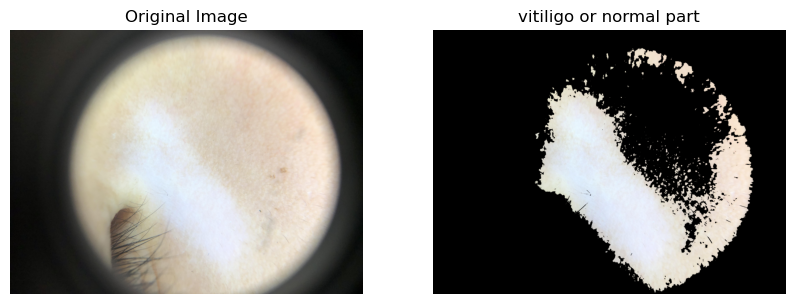

In [ ]:
import cv2
import numpy as np

# Load image
image = cv2.imread(r"C:\Users\salon\vitiligo\img_t_10_0054_jpg.rf.1b01e9d07b44c2650680469504fd5853.jpg")  # Replace with your image path

# Extract white regions
white_regions, white_mask = extract_white_color(image)

# Display results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)

plt.imshow(cv2.cvtColor(white_regions, cv2.COLOR_BGR2RGB))
plt.title("vitiligo or normal part")
plt.axis("off")

plt.show()


Number of vitiligo cell pixels: 0


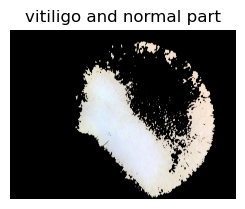

In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\salon\vitiligo\img_t_10_0054_jpg.rf.1b01e9d07b44c2650680469504fd5853.jpg", cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Define white pixel (255 for grayscale)
white_pixels = np.sum(image == 255)

print("Number of vitiligo cell pixels:", white_pixels)
plt.subplot(1, 2, 2)

plt.imshow(cv2.cvtColor(white_regions, cv2.COLOR_BGR2RGB))
plt.title("vitiligo and normal part")

plt.axis("off")

plt.show()


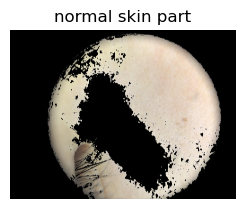

Image saved successfully as 'skin_extracted.jpg'


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\salon\vitiligo\img_t_10_0054_jpg.rf.1b01e9d07b44c2650680469504fd5853.jpg")

# Convert to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define skin color range in HSV
lower_skin = np.array([0, 20, 70], dtype=np.uint8)   # Lower bound for skin color
upper_skin = np.array([25, 255, 255], dtype=np.uint8)  # Upper bound for skin color

# Create a binary mask where skin color pixels are white
mask = cv2.inRange(hsv, lower_skin, upper_skin)

# Apply mask to extract skin region
skin = cv2.bitwise_and(image, image, mask=mask)

# Display results
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(skin, cv2.COLOR_BGR2RGB))
plt.title("normal skin part")
plt.axis("off")

plt.show()
# Save the output image
cv2.imwrite("skin_extracted.jpg", skin)

print("Image saved successfully as 'skin_extracted.jpg'")


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread(r"C:\Users\salon\vitiligo\img_t_10_0054_jpg.rf.1b01e9d07b44c2650680469504fd5853.jpg", cv2.IMREAD_GRAYSCALE)  # Load in grayscale

# Define white pixel (255 for grayscale)
skin_pixels = np.sum(image == 240)

print("Number of healthy skin pixels:", skin_pixels)


Number of healthy skin pixels: 50834
